In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("Customer360Insights.csv")
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,...,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,...,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,...,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,...,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,...,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN


In [26]:
df = df[df['OrderConfirmation'] == True]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SessionStart           1700 non-null   object
 1   CustomerID             1700 non-null   int64 
 2   FullName               1700 non-null   object
 3   Gender                 1700 non-null   object
 4   Age                    1700 non-null   int64 
 5   CreditScore            1700 non-null   int64 
 6   MonthlyIncome          1700 non-null   int64 
 7   Country                1700 non-null   object
 8   State                  1700 non-null   object
 9   City                   1700 non-null   object
 10  Category               1700 non-null   object
 11  Product                1700 non-null   object
 12  Cost                   1700 non-null   int64 
 13  Price                  1700 non-null   int64 
 14  Quantity               1700 non-null   int64 
 15  CampaignSchema       

In [28]:
df['OrderConfirmationTime'] = pd.to_datetime(df['OrderConfirmationTime'], format = '%Y-%m-%d %H:%M')

In [29]:
df['Revenue'] = df['Price'] * df['Quantity']

In [30]:
foredf = df[['OrderConfirmationTime', 'Revenue']]
foredf.head()

,OrderConfirmationTime,Revenue
0,2019-01-01 03:02:00,200
1,2019-01-02 20:58:00,480
2,2019-01-04 03:40:00,40
3,2019-01-05 09:26:00,40
4,2019-01-05 13:52:00,600


In [31]:
# Daily data
foredf = foredf.resample(rule='D', on='OrderConfirmationTime')['Revenue'].sum()
foredf = foredf.to_frame().reset_index()

In [32]:
foredf.head()

,OrderConfirmationTime,Revenue
0,2019-01-01,200
1,2019-01-02,480
2,2019-01-03,0
3,2019-01-04,40
4,2019-01-05,640


In [33]:
# Breaking down date
foredf['Year'] = foredf['OrderConfirmationTime'].apply(lambda x: x.year)
foredf['Month'] = foredf['OrderConfirmationTime'].apply(lambda x: x.month)
foredf['Day'] = foredf['OrderConfirmationTime'].apply(lambda x: x.day)

In [34]:
foredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OrderConfirmationTime  1826 non-null   datetime64[ns]
 1   Revenue                1826 non-null   int64         
 2   Year                   1826 non-null   int64         
 3   Month                  1826 non-null   int64         
 4   Day                    1826 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 71.5 KB


In [35]:
# 2023 data will be saved for evaluation
train = foredf.loc[(foredf['OrderConfirmationTime'] <'2023-01-01')] 
test = foredf.loc[(foredf['OrderConfirmationTime'] >= '2023-01-01')] 

train = train.drop(["OrderConfirmationTime"], axis=1)
test = test.drop(["OrderConfirmationTime"], axis=1)

train

,Revenue,Year,Month,Day
0,200,2019,1,1
1,480,2019,1,2
2,0,2019,1,3
3,40,2019,1,4
4,640,2019,1,5
...,...,...,...,...
1456,0,2022,12,27
1457,50,2022,12,28
1458,4670,2022,12,29
1459,210,2022,12,30


In [36]:
test

,Revenue,Year,Month,Day
1461,210,2023,1,1
1462,43,2023,1,2
1463,24,2023,1,3
1464,280,2023,1,4
1465,1650,2023,1,5
...,...,...,...,...
1821,0,2023,12,27
1822,4500,2023,12,28
1823,0,2023,12,29
1824,0,2023,12,30


In [37]:
# Features: day,month,year
# Target: Revenue
# Splitting train and test sets
X_train = train[['Day','Month', 'Year']]
y_train = train['Revenue']

X_test = test[['Day','Month', 'Year']]
y_test = test['Revenue']

In [38]:
# Normalizing data to properly scale them in the feature space and help the model discern patterns
# Without normalizing, this model predicts badly
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [39]:
# Tuning and fitting and xgboost regression model.
import xgboost as xgb

xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    n_estimators=1000, early_stopping_rounds=50, objective='reg:linear', max_depth=3, learning_rate=0.01)
xgb_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:1868.72861	validation_1-rmse:1708.46439
[100]	validation_0-rmse:1723.45427	validation_1-rmse:1611.02011
[171]	validation_0-rmse:1693.43081	validation_1-rmse:1612.72453


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

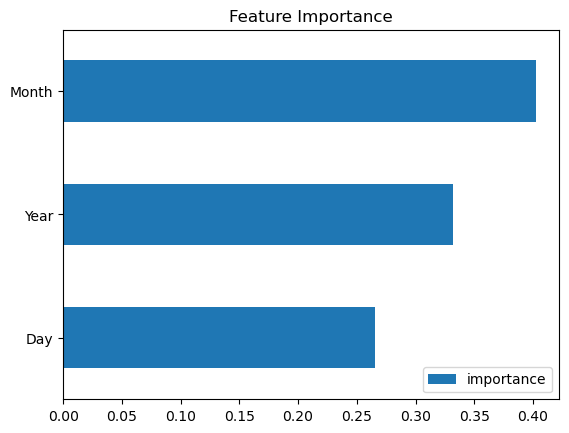

In [40]:
# Plotting feature importance. Months have the greatest impact in the data, followed by years
fi = pd.DataFrame(data=xgb_model.feature_importances_,
             index= xgb_model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [42]:
# Merging the predictions with our revenue table
test['Prediction'] = xgb_model.predict(X_test)
foredf = foredf.merge(test[['Prediction']], how='left', left_index=True, right_index=True)
foredf

,OrderConfirmationTime,Revenue,Year,Month,Day,Prediction
0,2019-01-01,200,2019,1,1,NaN
1,2019-01-02,480,2019,1,2,NaN
2,2019-01-03,0,2019,1,3,NaN
3,2019-01-04,40,2019,1,4,NaN
4,2019-01-05,640,2019,1,5,NaN
...,...,...,...,...,...,...
1821,2023-12-27,0,2023,12,27,548.757141
1822,2023-12-28,4500,2023,12,28,852.913269
1823,2023-12-29,0,2023,12,29,535.120789
1824,2023-12-30,0,2023,12,30,535.120789


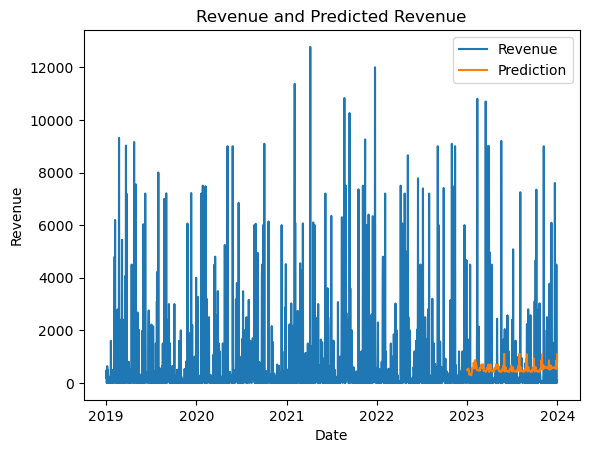

<Figure size 1500x500 with 0 Axes>

In [43]:
plt.plot(foredf['OrderConfirmationTime'], foredf['Revenue'])   
plt.plot(foredf['OrderConfirmationTime'], foredf['Prediction'])       

# Axes formatting
plt.xlabel('Date')     # horizontal axis label
plt.ylabel('Revenue')     # vertical axis label
plt.title('Revenue and Predicted Revenue')   # figure title
plt.legend(['Revenue', 'Prediction']) # legend
plt.figure(figsize=(15, 5))
plt.show()


In [44]:
# Saving to csv to import into powerbi
foredf.drop(['Day', 'Month', 'Year'], axis=1).to_csv("2023sales.csv", index=False)

In [45]:
# New 2024 set to test the model
set2024 = pd.DataFrame()
set2024['Date'] = pd.date_range(start='01/01/24', end = '31/12/24') # Adding all dates of 2024 to a column
set2024

,Date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
361,2024-12-27
362,2024-12-28
363,2024-12-29
364,2024-12-30


In [46]:
# Breaking down dates
set2024['Day'] = set2024['Date'].apply(lambda x: x.day)
set2024['Month'] = set2024['Date'].apply(lambda x: x.month)
set2024['Year'] = set2024['Date'].apply(lambda x: x.year)


# Train data will be our previous data. Testing data will be 2024 dates
train = foredf.drop(["OrderConfirmationTime"], axis=1)
test = set2024.drop(['Date'], axis=1)

X_train = train[['Day','Month', 'Year']]
y_train = train['Revenue']

X_test = test[['Day','Month', 'Year']]

#We have to normalize again as train values changed
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [47]:
# Tuning model again, this time without early stopping as we do not have evaluation set
xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
xgb_model.fit(X_train_norm, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
# Predicting values for the dates
set2024['Prediction'] = xgb_model.predict(X_test_norm)

In [50]:
set2024

,Date,Day,Month,Year,Prediction
0,2024-01-01,1,1,2024,330.114014
1,2024-01-02,2,1,2024,330.114014
2,2024-01-03,3,1,2024,269.840393
3,2024-01-04,4,1,2024,336.265076
4,2024-01-05,5,1,2024,336.265076
...,...,...,...,...,...
361,2024-12-27,27,12,2024,628.487183
362,2024-12-28,28,12,2024,1197.338013
363,2024-12-29,29,12,2024,739.390991
364,2024-12-30,30,12,2024,708.514221


In [51]:
# Csv for powerbi
set2024.drop(['Day', 'Month', 'Year'], axis=1).to_csv("2024forecast.csv", index=False)